## Importing Necessary Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler,MinMaxScaler
from sklearn.pipeline import make_pipeline # Optional
from sklearn.metrics import r2_score

### Problem Statement + Data
- Multiple Algorithms applicable
- Multiple preprocessing techniques
- Multiple hyperparameters 
- Multiple features

### Example of model variants
- Model1: LinearRegression + StandardScaler
- Model2: LinearRegression + MinMaxScaler
- Model3: LinearRegression + MinMaxScaler + PolynomialFeatures
- Model4: LinearRegression + StandardScaler + PolynomialFeatures
- Model5: Lasso + MinMaxScaler
- Model6: Lasso + StandardScaler
- Model7: Ridge + StandardScaler
- Model8: Ridge + MinMaxScaler
...
...

In [6]:
df=pd.read_csv("model_selection_data.csv")
#https://drive.google.com/file/d/1tX62d7cA8Vb_5zOEuhwjE5vLZ5aq7RjG/view?usp=drive_link

In [8]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [10]:
# The Boston Housing Dataset
# The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:
# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# Target - Median value of owner-occupied homes in $1000's

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Missing Values

In [14]:
df.isnull().mean()

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
Target     0.0
dtype: float64

## EDA
- Skipping EDA to focus more on important agenda for today, but EDA is a mandatory task in any model development process

In [18]:
X=df.drop(["Target"],axis=1)
y=df["Target"]

In [20]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


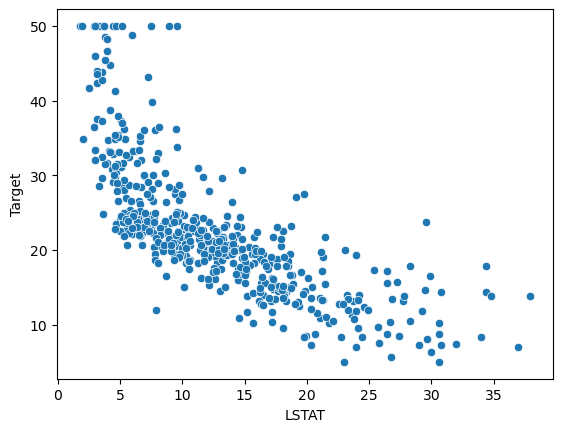

In [29]:
import seaborn as sns
sns.scatterplot(x=df["LSTAT"],y=df["Target"])
plt.show()

## Base Model

In [31]:
# Data --> Scaling (mandatory) --> PolynomialFeatures (Optional) --> Training (Algorithm)

In [33]:
### Model1: StandardScaler + PolynomialFeatures(degree=2) + LinearRegression

In [35]:
linear_reg_pipeline=make_pipeline(StandardScaler(),PolynomialFeatures(degree=2),LinearRegression())
linear_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [37]:
# Predictions
y_pred_linear_reg_train = linear_reg_pipeline.predict(X_train)
y_pred_linear_reg_test = linear_reg_pipeline.predict(X_test)

In [39]:
# R2 Calculations
r2_linear_reg_train = r2_score(y_train, y_pred_linear_reg_train)
r2_linear_reg_test = r2_score(y_test, y_pred_linear_reg_test)

In [41]:
print("Training R-squared:")
print(f"Linear Regression: {r2_linear_reg_train:.2f}")
print("\nTesting R-squared:")
print(f"Linear Regression: {r2_linear_reg_test:.2f}")

Training R-squared:
Linear Regression: 0.94

Testing R-squared:
Linear Regression: 0.81


In [43]:
#y=m1x1^2+m2x+m3x2^2+m4x+....
# Sign of overfitting because there is a difference of 13-14% in train and test performance

## Ridge Regression (Regularisation Technique)

In [ ]:
# cf=mse+alpha*coeff

In [98]:
ridge_reg_pipeline=make_pipeline(StandardScaler(),PolynomialFeatures(degree=2),Ridge(alpha=75))
ridge_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge(alpha=75))])

In [100]:
# Predictions
y_pred_ridge_reg_train = ridge_reg_pipeline.predict(X_train)
y_pred_ridge_reg_test = ridge_reg_pipeline.predict(X_test)

In [102]:
# R2 Calculations
r2_ridge_reg_train = r2_score(y_train, y_pred_ridge_reg_train)
r2_ridge_reg_test = r2_score(y_test, y_pred_ridge_reg_test)

In [104]:
print("Training R-squared:")
print(f"Ridge Regression: {r2_ridge_reg_train:.2f}")
print("\nTesting R-squared:")
print(f"Ridge Regression: {r2_ridge_reg_test:.2f}")

Training R-squared:
Ridge Regression: 0.90

Testing R-squared:
Ridge Regression: 0.82


In [96]:
# Maximise both train and test and minimum difference between train and test
#alpha=85, Train:89%, Test:82%
#alpha=150, Train:87%, Test:80%
#alpha=120, Train:88%, Test:81%

## Ridge Regression (Regularisation Technique - MinMaxScaler)

In [133]:
ridge_reg_pipeline=make_pipeline(MinMaxScaler(),PolynomialFeatures(degree=2),Ridge(alpha=0.05))
ridge_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge(alpha=0.05))])

In [135]:
# Predictions
y_pred_ridge_reg_train = ridge_reg_pipeline.predict(X_train)
y_pred_ridge_reg_test = ridge_reg_pipeline.predict(X_test)

In [137]:
# R2 Calculations
r2_ridge_reg_train = r2_score(y_train, y_pred_ridge_reg_train)
r2_ridge_reg_test = r2_score(y_test, y_pred_ridge_reg_test)

In [139]:
print("Training R-squared:")
print(f"Ridge Regression: {r2_ridge_reg_train:.2f}")
print("\nTesting R-squared:")
print(f"Ridge Regression: {r2_ridge_reg_test:.2f}")

Training R-squared:
Ridge Regression: 0.92

Testing R-squared:
Ridge Regression: 0.85


In [141]:
#alpha=0.9, Train:87%, Test:83%
#alpha=0.8, Train:87%, Test:84%
#alpha=0.7, Train:88%, Test:84%
#alpha=0.6, Train:88%, Test:84%
#alpha=0.2, Train:90%, Test:85%

## Lasso Regression (Regularisation Technique)

In [144]:
lasso_reg_pipeline=make_pipeline(StandardScaler(),PolynomialFeatures(degree=2),Lasso(alpha=0.45))
lasso_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('lasso', Lasso(alpha=0.45))])

In [146]:
# Predictions
y_pred_lasso_reg_train = lasso_reg_pipeline.predict(X_train)
y_pred_lasso_reg_test = lasso_reg_pipeline.predict(X_test)

In [148]:
# R2 Calculations
r2_lasso_reg_train = r2_score(y_train, y_pred_lasso_reg_train)
r2_lasso_reg_test = r2_score(y_test, y_pred_lasso_reg_test)

In [150]:
print("Training R-squared:")
print(f"Lasso Regression: {r2_lasso_reg_train:.2f}")
print("\nTesting R-squared:")
print(f"Lasso Regression: {r2_lasso_reg_test:.2f}")

Training R-squared:
Lasso Regression: 0.83

Testing R-squared:
Lasso Regression: 0.78


In [152]:
#alpha=0.45, Train:83%, Test:78%
#alpha=0.7, Train:80%, Test:76%
#alpha = 0.3, Train = 0.85, Test = 0.79

## Lasso Regression (Regularisation Technique - MinMaxScaler)

In [155]:
lasso_reg_pipeline=make_pipeline(MinMaxScaler(),PolynomialFeatures(degree=2),Lasso(alpha=0.019))
lasso_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('lasso', Lasso(alpha=0.019))])

In [157]:
# Predictions
y_pred_lasso_reg_train = lasso_reg_pipeline.predict(X_train)
y_pred_lasso_reg_test = lasso_reg_pipeline.predict(X_test)

In [159]:
# R2 Calculations
r2_lasso_reg_train = r2_score(y_train, y_pred_lasso_reg_train)
r2_lasso_reg_test = r2_score(y_test, y_pred_lasso_reg_test)

In [161]:
print("Training R-squared:")
print(f"Lasso Regression: {r2_lasso_reg_train:.2f}")
print("\nTesting R-squared:")
print(f"Lasso Regression: {r2_lasso_reg_test:.2f}")

Training R-squared:
Lasso Regression: 0.86

Testing R-squared:
Lasso Regression: 0.82


In [163]:
#alpha=0.021, Train:85%, Test:82%

## Model Selection:

In [ ]:
- Linear Regression (BaseLine Model)       :Train:94%, Test:81% - 13% (Rejected)
- Ridge Model (alpha=85, Standard Scaler)  :Train:89%, Test:82% - 7%  (Rejected)
- Ridge Model (alpha=0.8, MinMax Scaler)   :Train:87%, Test:84% - 3%  (Not Rejected) - (Selected) - Less Overfitting
- Ridge Model (alpha=0.2, MinMax Scaler)   :Train:90%, Test:85% - 5%  (Not Rejected) - (Selected) - High Performance
- Lasso Model (alpha=0.3, Standard Scaler):Train:85%, Test:79% - 6%   (Rejected)
- Lasso Model (alpha=0.021, MinMax Scaler) :Train:85%, Test:82% - 3%  (Rejected)